# Exercise 0.10
Over the next couple of exercises we will make use of the Galton dataset, a dataset of heights of fathers
and sons from the 1877 paper that first discussed the “regression to the mean” phenomenon. This dataset has 928 pairs
of numbers.
* Use the ``load()`` function in the ``galton.py`` file to load the dataset. The file is located under the lxmls/readers folder. Type the following in your Python interpreter:

``import galton as galton
galton_data = galton.load()``

* What are the mean height and standard deviation of all the people in the sample? What is the mean height of the
fathers and of the sons?
* Plot a histogram of all the heights (you might want to use the plt.hist function and the ravel method on
arrays).
* Plot the height of the father versus the height of the son.
* You should notice that there are several points that are exactly the same (e.g., there are 21 pairs with the values 68.5
and 70.2). Use the ``?`` command in ipython to read the documentation for the numpy.random.randn function
and add random jitter (i.e., move the point a little bit) to the points before displaying them. Does your impression
of the data change?

Mean height of fathers: 68.30818965517241, Std: 1.7863701392420732
Mean heigth of sons: 68.08846982758622, Std: 2.516584351160004


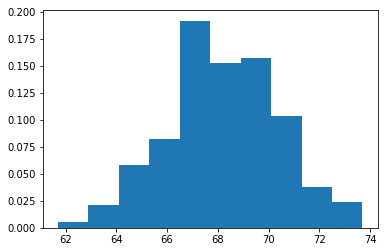

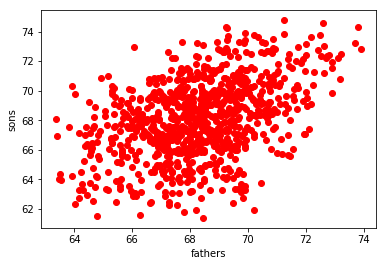

In [1]:
import sys
sys.path.append("/home/candeiasalexandre/code/lxmls-toolkit/lxmls/readers")
import numpy as np
import galton as galton
import matplotlib.pyplot as plt
import ipdb

galton_data = galton.load()
#without bias
print("Mean height of fathers: {}, Std: {}".format(np.mean(galton_data[:,0]), np.std(galton_data[:,0])))
print("Mean heigth of sons: {}, Std: {}".format( np.mean(galton_data[:,1]), np.std(galton_data[:,1])))

all_heights_hist = np.histogram(galton_data.reshape(-1,1), bins=100)
%matplotlib inline
plt.hist(galton_data.reshape(-1,1), bins=10, density=True)
plt.show()
noise_par = 0.5
plt.plot(galton_data[:,0] + noise_par*np.random.randn(galton_data[:,0].shape[0]),
         galton_data[:,1] + noise_par*np.random.randn(galton_data[:,1].shape[0]), "ro")
plt.xlabel("fathers"); plt.ylabel("sons")
plt.show()

# Exercise 0.11 
Consider the function $f(x) = x^2$ and its derivative 
$ \frac{\partial f}{\partial x} $.
Look at the derivative of that function at points ``[-2,0,2]``, draw the tangent to the graph in that point 
$ \frac{\partial f}{\partial x}(-2)=-4 $, 
$ \frac{\partial f}{\partial x}(0)=0 $ and 
$ \frac{\partial f}{\partial x}(2)=4 $. 

For example, the tangent
equation for $x = −2$ is $y = −4x − b$, where $b = f(−2)$. The following code plots the function and the derivatives on
those points using matplotlib (See Figure 4).

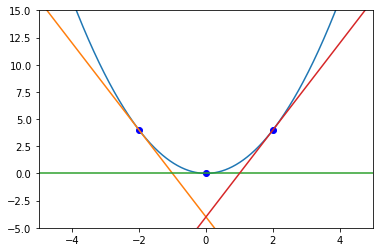

In [2]:
import numpy as np
import matplotlib.pyplot as plt

a = np.arange(-5,5,0.01)
f_x = np.power(a,2)
plt.plot(a,f_x)
plt.xlim(-5,5)
plt.ylim(-5,15)
k = np.array([-2,0,2])
plt.plot(k,k**2,"bo")
for i in k:
    plt.plot(a, (2*i)*a - (i**2))

# Exercise 0.12 
Consider the function $f(x) = (x + 2)^2 − 16 \text{exp}(−(x − 2)^2)$
. Make a function that computes the
function value given x

In [3]:
def get_y(x):
    return (x+2)**2 - 16*np.exp(-((x-2)**2))

Draw a plot around $x \in [−8, 8]$.

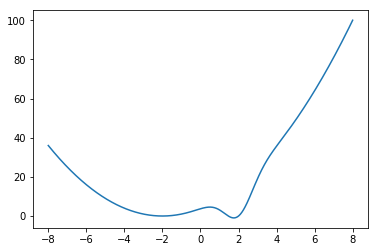

In [4]:
x = np.arange(-8, 8, 0.001)
y = get_y(x)
plt.plot(x, y)

Calculate the derivative of the function $f(x)$, implement the function ``get grad(x)``.

In [5]:
def get_grad(x):
    return (2*x+4)-16*(-2*x + 4)*np.exp(-((x-2)**2))

Use the method gradient descent to find the minimum of this function. Convince yourself that the code is doing the
proper thing. Look at the constants we defined. Note, that we are using a simple approach to pick the step size (always
have the value step size) which is not necessarily correct

In [6]:
def gradient_descent(start_x,func,grad, step_size=0.1):
    # Precision of the solution
    prec = 0.0001
    #Use a fixed small step size
    #step_size = 0.1
    #max iterations
    max_iter = 100
    x_new = start_x
    res = []
    for i in range(max_iter):
        x_old = x_new
        #Use beta egual to -1 for gradient descent
        x_new = x_old - step_size * grad(x_new)
        f_x_new = func(x_new)
        f_x_old = func(x_old)
        res.append([x_new,f_x_new])
        if(abs(f_x_new - f_x_old) < prec):
            print("change in function values too small, leaving")
            return np.array(res)
    print("exceeded maximum number of iterations, leaving")
    return np.array(res)

Run the gradient descent algorithm starting from $x_0 = −8$ and plot the minimizing sequence.

change in function values too small, leaving


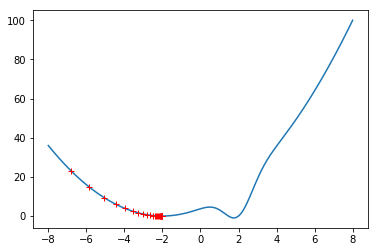

In [7]:
x = np.arange(-8,8,0.001)
y = get_y(x)
plt.plot(x,y)

x_0 = -8
res = gradient_descent(x_0,get_y,get_grad)
plt.plot(res[:,0],res[:,1],'r+')

change in function values too small, leaving


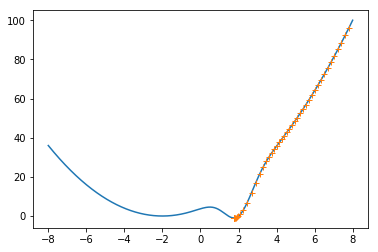

In [8]:
x = np.arange(-8,8,0.001)
y = get_y(x)
plt.plot(x,y)

x_0 = 8
res = gradient_descent(x_0,get_y,get_grad, step_size=0.01)
plt.plot(res[:,0],res[:,1],'+')

# Exercise 0.13 
Consider the linear regression problem (ordinary least squares) on the Galton dataset, with a single response
variable

\begin{equation*}
y = x^Tw + ε
\end{equation*}

The linear regression problem is, given a set $\{y
(i)\}_i$ of samples of $y$ and the corresponding $x^{(i)}$ vectors, estimate w
to minimise the sum of the $\epsilon$ variables. Traditionally this is solved analytically to obtain a closed form solution (although
this is **not the way in which it should be computed** in this exercise, linear algebra packages have an optimised solver,
with numpy, use ``numpy.linalg.lstsq``).
Alternatively, we can define the error function for each possible $w$:

\begin{equation*}
e(w) = \sum_i ( x^{(i)^T} w - y^{(i)} )^2.
\end{equation*}


1) Derive the gradient of the error $\frac{\partial e}{\partial w_j}$.

\begin{equation*}
\frac{\partial e}{\partial w_j} = \sum_i 2 x_j^{(i)} ( x^{(i)^T} w - y^{(i)} ).
\end{equation*}

2) Implement a solver based on this for two dimensional problem (*i.e.*, $w \in R^2$)

3) Use this method on the Galton dataset from the previous exercise to estimate the relationship between father and son’s height. Try two formulas

$s = f w_1 + \epsilon$, 

where s is the son’s height, and f is the father heights; and

$s = f w_1 + 1w_0 + \epsilon$,

where the input variable is now two dimensional: $(f , 1)$. This allows the intercept to be non-zero.

4) Plot the regression line you obtain with the points from the previous exercise.

5) Use the ``np.linalg.lstsq`` function and compare to your solution.

Plotting regressions:

In [19]:
def error_linear(x_data, y_data, w):
    """
        x_data - n_samples x n_features
        y_data - n_samples x output
        w - n_features x 1
    """
    error = np.matmul(x_data, w) - y_data
    #ipdb.set_trace()
    return error

def get_linear_grad(x_data, y_data, w):
    """
        x_data - n_samples x n_features
        y_data - n_samples x output
        w - n_features x 1
    """
    # WHY divide by the len of the dataset?? ptherwise it does not converge
    gradient = np.matmul(x_data.transpose(), 2.0*error_linear(x_data, y_data, w))
    #ipdb.set_trace()
    return gradient

def linear_gradient_descent(x_data, y_data, max_iter=1000, min_tol=0.00000001, descent_step=0.01):
    """
        x_data - n_samples x n_features
        y_data - n_samples x output
    """
    
    w = np.random.randn(x_data.shape[1],1)
    w_old = w + 0.0
    w_list = []
    for k in range(max_iter):
        w = w_old - descent_step * get_linear_grad(x_data, y_data, w_old)
        update = np.linalg.norm(w-w_old)
        if(update <= min_tol):
            break
        #ipdb.set_trace()
        w_old = w
        w_list.append(w)
    return w, k, w_list


galton_data = galton.load()
#without bias
x_data = galton_data[:,0]
x_data = x_data.reshape(x_data.shape[0], 1)
y_data = galton_data[:,1]
y_data = y_data.reshape(y_data.shape[0], 1)
w_fit, k, w_list = linear_gradient_descent(x_data, y_data)
print("Without Bias")
print("Parameter: {}, Iteration: {}".format(w_fit, k))
#print("W_list:{}".format(w_list))

#With Bias
x_data = galton_data[:,0]
x_data = x_data.reshape(x_data.shape[0], 1)
x_data = np.column_stack((x_data, np.ones(x_data.shape)))
y_data = galton_data[:,1]
y_data = y_data.reshape(y_data.shape[0], 1)
w_fit, k, w_list = linear_gradient_descent(x_data, y_data)
print("With Bias")
print("Parameter: {}, Iteration: {}".format(w_fit, k))
#print("W_list:{}".format(w_list))


Without Bias
Parameter: [[nan]], Iteration: 999
With Bias
Parameter: [[nan]
 [nan]], Iteration: 999


/home/candeiasalexandre/code/lxmls-toolkit/venv/lib/python3.5/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in multiply
/home/candeiasalexandre/code/lxmls-toolkit/venv/lib/python3.5/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in subtract
/home/candeiasalexandre/code/lxmls-toolkit/venv/lib/python3.5/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in matmul


# Exercise 0.14 
Use the debugger to debug the ``buggy.py`` script which attempts to repeatedly perform the following
computation:....

1. Start $x_0 = 0$
2. Iterate

    (a) $x'_{t+1} = x_t + r$, where $r$ is a random variable.

    (b) if $x'_{t+1} >= 1$, then stop.
    
    (c) if $x'_{t+1} <= 0$, then $x_{t+1} = 0$

    (d) else $x_{t+1} = x'_{t+1}$

3. Return the number of iterations

In [ ]:
def next_x(x):
    x_new = x + np.random.normal(scale=.0625)
    if x_new <= 0.0:
        return 0.0
    return x_new


def walk():
    iters = 0
    x = 0.0
    while x <= 1.0:
        x = next_x(x)
        iters += 1
    return iters


walks = np.array([walk() for i in range(1000)])

print(np.mean(walks))

Having repeated this computation a number of times, the programme prints the average. Unfortunately, the program
has a few bugs, which you need to fix.

In [ ]:
walks